In [1]:
using NPZ
using PyPlot, Statistics, Distributions
include("../src/function/extended_delta_map.jl")
include("../src/function/r_estimate_extended.jl")
include("../src/function/set_data_model.jl")
# set parameters
freq_bands = [40, 60, 140]
freq_bands = [40, 50, 60, 68, 78, 89, 100, 119]
#freq_bands = [40, 50, 60, 68, 78, 89, 100, 119, 140, 166, 195, 235, 280, 337, 402]; #GHz
which_model = "s1"
r_input = 0.01
seed = 2
nside = 4
num_I = 2  
cov_mat_scal = npzread("../covariance_matrix/smoothing_cov_mat_scal.npy")
cov_mat_tens = npzread("../covariance_matrix/smoothing_cov_mat_tens.npy")
mask_path = "../mask_p06_Nside4.v2.fits"
mask = hp.read_map(mask_path);
N⁻¹_set = Matrix{Float64}[]  
m_set = Vector{Float64}[]  
r_est = 0.5

# definite SetParams and FitParams struct
set_params = SetParams(freq_bands, which_model, r_input, seed, nside, num_I, cov_mat_scal, cov_mat_tens, mask, m_set, N⁻¹_set)
fit_params = FitParams(-3, 1.5, 20.1, r_est);

In [2]:
set_num_I!(set_params)
set_N⁻¹!(set_params)
set_m_vec!(set_params);

sys:1: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 


In [3]:
@time iterative_minimization(set_params, fit_params)

Iteration 1: r = 0.014576277135870397, Likelihood = -9.889024159906752e6
delta_like = 1.0009889024159906e10
delta_r = 0.4854237228641296
Iteration 2: r = 0.01443273298655251, Likelihood = -9.88900995893267e6
delta_like = 14.200974082574248
delta_r = 0.00014354414931788684
Iteration 3: r = 0.014432424047057968, Likelihood = -9.889009774868393e6
delta_like = 0.18406427651643753
delta_r = 3.0893949454213754e-7
Iteration 4: r = 0.014432424047057968, Likelihood = -9.889009774868393e6
delta_like = 0.0
delta_r = 0.0
 14.949098 seconds (1.30 M allocations: 55.107 GiB, 18.88% gc time, 4.84% compilation time: 60% of which was recompilation)


In [4]:
num_seeds = 10
@time r_dis, beta_s_dis, beta_d_dis, T_d_dis = estimate_r_distribution(set_params, fit_params, num_seeds)

Iteration 1: r = 0.006119079435539354, Likelihood = -9.068180881067002e6
delta_like = 1.0009068180881067e10
delta_r = 0.008313344611518614
Iteration 2: r = 0.006122468748129162, Likelihood = -9.068178797959007e6
delta_like = 2.0831079948693514
delta_r = 3.3893125898076804e-6
Iteration 3: r = 0.00612288579688558, Likelihood = -9.068178793740578e6
delta_like = 0.004218429327011108
delta_r = 4.170487564181258e-7
Iteration 1: r = 0.014432424047057968, Likelihood = -9.889009774868393e6
delta_like = 1.0009889009774868e10
delta_r = 0.0
Iteration 2: r = 0.014432424047057968, Likelihood = -9.889009774868393e6
delta_like = 0.0
delta_r = 0.0
Iteration 1: r = 0.008377715443489864, Likelihood = -8.82756211912167e6
delta_like = 1.0008827562119122e10
delta_r = 0.006054708603568104
Iteration 2: r = 0.008216127328693479, Likelihood = -8.827546718805075e6
delta_like = 15.400316596031189
delta_r = 0.0001615881147963849
Iteration 3: r = 0.008216127328693479, Likelihood = -8.8275461391152e6
delta_like = 0.

(Any[0.00612288579688558, 0.014432424047057968, 0.008216127328693479, 0.012219609851164881, 0.014776081398938767, 0.016561043289715083, 0.009429024191219493, 0.016565288118085886, 0.00706683081463394, 0.012546282050199309], Any[-3.196026936138167, -3.1221851840184476, -3.1320392566986883, -3.1156682591404055, -3.0880126645014343, -3.1551518460253827, -3.09636240299103, -3.1629850880089156, -3.136635729507616, -3.2373244624342234], Any[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5], Any[20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1])

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


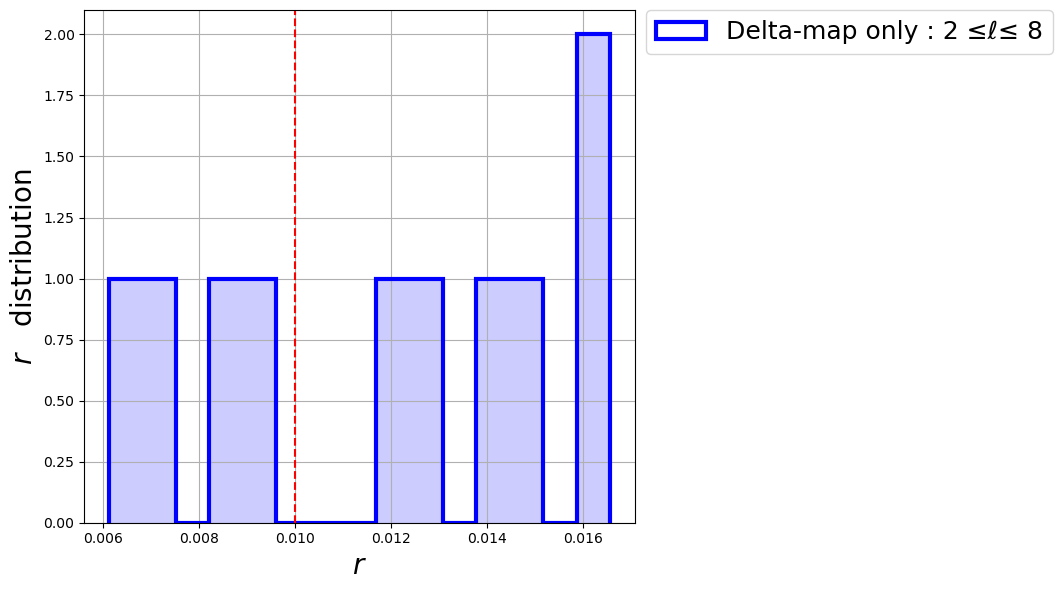

In [5]:
figure(figsize=(8, 6))
hist(r_dis, bins=15, alpha=0.2, color="blue", histtype="stepfilled")
hist(r_dis, bins = 15, alpha = 1., edgecolor = "blue", label = "Delta-map only : 2 ≤ℓ≤ 8", histtype = "step", linewidth = 3)
axvline(x = r_input, color = "red", linestyle = "--")
xlabel(L"$r$", fontsize=20)
ylabel(L"$r\quad$distribution", fontsize=20) 
plt.grid(true)
legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0., fontsize="18")
tight_layout()
subplots_adjust(right=0.8)
show()

In [6]:
mean(r_dis)

0.011793559688659439

In [7]:
mean(beta_s_dis)

-3.144239182946431